## Iris Dataset EDA

##### I know there are tons of repositories available for the Exploratory Data Analysis on the famous Iris Data set.

##### I am not an expert in Data Science, so i don’t intend to do all the algorithmic code instead i will use the tools that have already been developed by others

##### This is my version of EDA on Iris Dataset since it is one of the most common datasets that I came across in my journey into the data science world.

##### There are many versions of this dataset but i will be using the one from sklearn.datasets

In [2]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##### Now we need to create a pandas dataframe from the iris dataset.
###### load_iris is a function in sklearn.datasets which is a bunch of data and target variables and the description of datset.
###### we use DataFrame function in the pandas library to convert the array of data to Pandas Dataframe with the columns “Petal length”,”Petal Width”,”Sepal Length”,”Sepal Width” and create a new column “Species” with target values from the dataset. I have used lambda function to apply a function to convert the target values which are 0,1,2 to the corresponding target values(“setosa”,”versicolor”,”virginica”) for better understanding.

In [4]:
dataset=load_iris()
data=pd.DataFrame(dataset['data'],columns=["Petal length","Petal Width","Sepal Length","Sepal Width"])


In [5]:
data['Species']=dataset['target']

In [6]:
data['Species']=data['Species'].apply(lambda x: dataset['target_names'][x])

In [7]:
data.head()

,Petal length,Petal Width,Sepal Length,Sepal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### Use the function shape to find the dimensions of the dataframe. Which return a tuple value of rows and columns. In our Dataset we have 150 rows/records and 5 columns/features.

In [8]:
data.shape

(150, 5)

#### Use describe() function to see the statistics of the dataset such as mean, median, mode, standard deviation etc.

In [9]:
data.describe()

,Petal length,Petal Width,Sepal Length,Sepal Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### We need to verify the features are of which datatypes. We can use info() function to do the same. We can see that all of the features except Species are of float datatype and Species is of object/categorical datatype

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
Petal length    150 non-null float64
Petal Width     150 non-null float64
Sepal Length    150 non-null float64
Sepal Width     150 non-null float64
Species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


#### Let’s see if there are any null values present in the dataset. If there are any null values present then we need to follow one of the below steps
* Drop records which have NA values
* Substitute mean value (mean if the feature is numerical or mode if the feature is categorical) of the column/feature for the NA values
* Fill the NA values with “?” or -9999

In [11]:
data.isnull().sum()

Petal length    0
Petal Width     0
Sepal Length    0
Sepal Width     0
Species         0
dtype: int64

#### Now we will do some plotting/visualizing our data to understand the relation ship between the numerical features.
##### I have used seaborn library for plotting, we can also use python matplotlib library to visualize the data.

##### There are different types of plots like bar plot, box plot, scatter plot etc.
##### Scatter plot is very useful when we are analyzing the relation ship between 2 features on x and y axis.
##### In seaborn library we have pairplot function which is very useful to scatter plot all the features at once instead of plotting them individually.

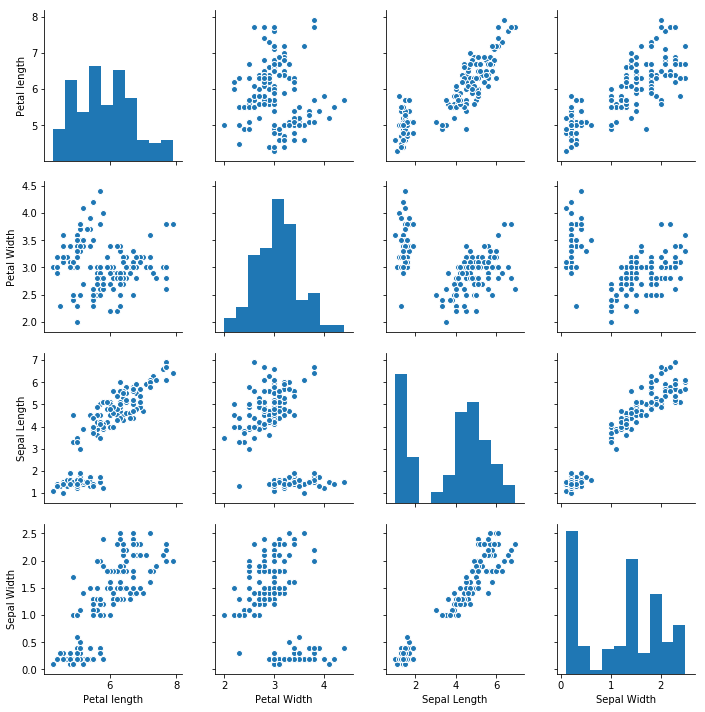

In [12]:
sns.pairplot(data)
plt.show()

##### Now we will see how these features are correlated to each other using heatmap in seaborn library. We can see that Sepal Length and Sepal Width features are slightly correlated with each other.

[]

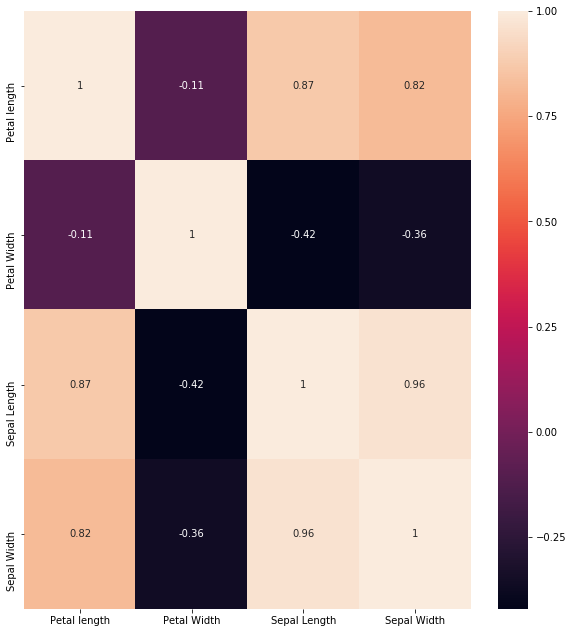

In [13]:
plt.figure(figsize=(10,11))
sns.heatmap(data.corr(),annot=True)
plt.plot()

#### Let’s see how our data is distributed based on Sepal Length and Width features using scatterplot.

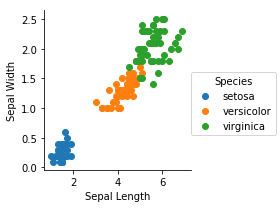

In [14]:
sns.FacetGrid(data,hue="Species")\
.map(plt.scatter,"Sepal Length","Sepal Width")\
.add_legend()
plt.show()

#### Similarly scatter plot of data based on Petal Length and Width features



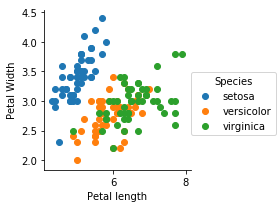

In [15]:
sns.FacetGrid(data,hue="Species")\
.map(plt.scatter,"Petal length","Petal Width")\
.add_legend()
plt.show()

#### Now let’s visualize the data with violin plot of all the input variables against output variable which is Species. The violinplot shows density of the length and width in the species. The thinner part denotes that there is less density whereas the fatter part conveys higher density

c:\users\hmittapa\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


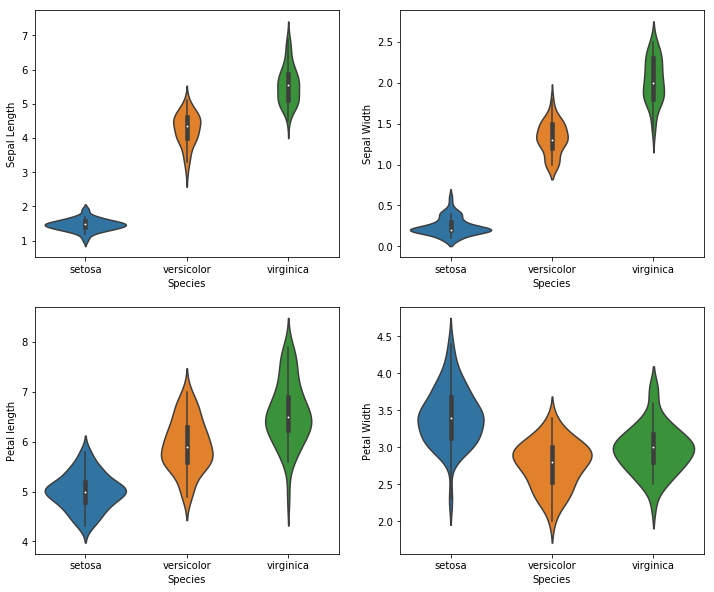

In [16]:

plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.violinplot(x="Species",y="Sepal Length",data=data)
plt.subplot(2,2,2)
sns.violinplot(x="Species",y="Sepal Width",data=data)
plt.subplot(2,2,3)
sns.violinplot(x="Species",y="Petal length",data=data)
plt.subplot(2,2,4)
sns.violinplot(x="Species",y="Petal Width",data=data)

#### And similarly use boxplot to see how the categorical feature “Species” is distributed with all other four input variables.

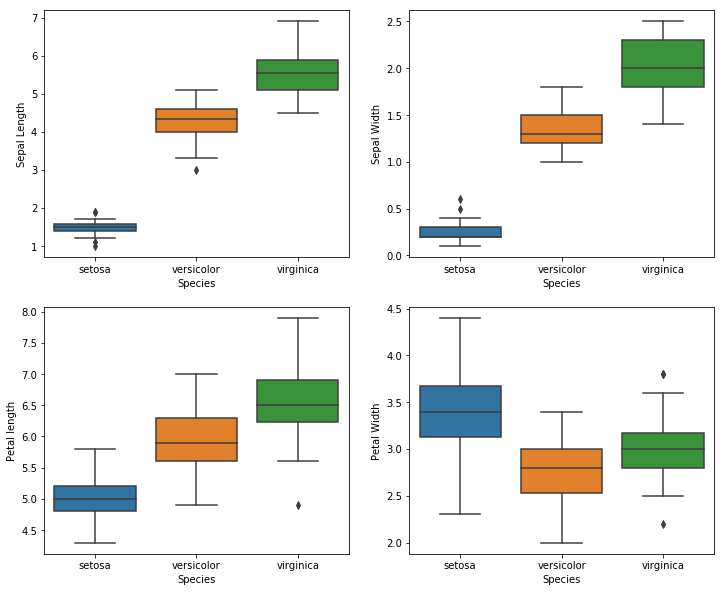

In [17]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.boxplot(x="Species",y="Sepal Length",data=data)
plt.subplot(2,2,2)
sns.boxplot(x="Species",y="Sepal Width",data=data)
plt.subplot(2,2,3)
sns.boxplot(x="Species",y="Petal length",data=data)
plt.subplot(2,2,4)
sns.boxplot(x="Species",y="Petal Width",data=data)

#### Import sklearn libraries to build our models


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm, metrics
from sklearn.tree import DecisionTreeClassifier

#### Before implementing any model we need to split the dataset to train and test sets. We use train_test_split class from sklearn.model_selection library to split our dataset.

In [19]:
train,test=train_test_split(data,test_size=0.3)

In [20]:
train.shape, test.shape

((105, 5), (45, 5))

#### Now let’s split the train and test sets further as input and output sets.

In [21]:
train_X=train[['Sepal Length',"Sepal Width","Petal length","Petal Width"]]
train_y=train.Species

In [22]:
test_X=test[['Sepal Length',"Sepal Width","Petal length","Petal Width"]]
test_y=test.Species

### Let's create SVM model and check the accuracy score

In [88]:
svmmodel=svm.SVC()
svmmodel.fit(train_X,train_y)
svmprediction=svmmodel.predict(test_X)
svmaccuracy=metrics.accuracy_score(svmprediction,test_y)
print("SVM model accuracy is {}".format(svmaccuracy))

SVM model accuracy is 1.0


### Now create the Logistic Regression Model

In [92]:
lrmodel=LogisticRegression()
lrmodel.fit(train_X,train_y)
lrprediction=lrmodel.predict(test_X)
lraccuracy=metrics.accuracy_score(lrprediction,test_y)
print("Logistic Regression Model Accuracy is {} ".format(lraccuracy))

Logistic Regression Model Accuracy is 0.9777777777777777 


### Decission Tree Model
##### First let’s get started with Decission Trees Model.

##### Decision tree builds classification or regression models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes. It uses Entropy and Information Gain to construct a decision tree.

### Entropy
##### Entropy controls how a Decision Tree decides to split the data. It actually effects how a Decision Tree draws its boundaries.

### Information Gain:
##### Information gain (IG) measures how much “information” a feature gives us about the class.

In [89]:
dtmodel=DecisionTreeClassifier()
dtmodel.fit(train_X,train_y)
dtpredict=dtmodel.predict(test_X)
dtaccuracy=metrics.accuracy_score(dtpredict,test_y)
print("Decission Tree Model Accuracy is {}".format(dtaccuracy*100))

Decission Tree Model Accuracy is 93.33333333333333


##### Accuracy score of our decision Tree model is 93.33%. Curious about knowing which are the wrongly predicted records?

In [91]:
test_preddf=test.copy()
test_preddf['Predicted Species']=dtpredict
wrongpred=test_preddf.loc[test['Species'] != dtpredict]
wrongpred

,Petal length,Petal Width,Sepal Length,Sepal Width,Species,Predicted Species
77,6.7,3.0,5.0,1.7,versicolor,virginica
133,6.3,2.8,5.1,1.5,virginica,versicolor
129,7.2,3.0,5.8,1.6,virginica,versicolor


##### As we can see above 77th indexed record is actually versicolor Specie but predicted as virginica and other 2(133th,129th) records are of virginica but predicted as versicolor.

#### We can see that SVM model is producing the better accuracy than Logistic Regression and Decission Tree Models.